In [564]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers , models
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"

df = pd.read_csv(url)
df.head(5)



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [514]:
df.shape

(7043, 21)

In [515]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [516]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [517]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [518]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [519]:
df.duplicated().sum()

np.int64(0)

**Checking the percentage count of customer get churned or not**

In [520]:
df['Churn'].value_counts(normalize=True)*100

,proportion
Churn,
No,73.463013
Yes,26.536987


In [521]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [522]:
df.drop('customerID' , axis=1 , inplace=True)                    #customerID ka koi model me kaam nahi → drop:


In [523]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [524]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


**Fixing total charges**

In [525]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [526]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'] , errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median() , inplace = True)

/tmp/ipython-input-3918046568.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median() , inplace = True)


In [527]:
df['TotalCharges'].dtype

dtype('float64')

In [528]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [529]:
df['Churn'] = df['Churn'].map({'Yes':1 , 'No':0})

In [530]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [531]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [532]:
df = pd.get_dummies(df, columns = cat_cols , drop_first=True)
df.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [533]:
df.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

**Now we'll be doing train test split**

In [534]:
x = df.drop('Churn' , axis = 1)
y = df['Churn']

In [535]:
rf = RandomForestClassifier(n_estimators= 150 , random_state=42)
rfe = RFE(estimator=rf , n_features_to_select=5)
rfe.fit(x,y )

RFE(estimator=RandomForestClassifier(n_estimators=150, random_state=42),
    n_features_to_select=5)


# STEP–BY–STEP SIMPLEST EXPLANATION
# ✔ STEP 1: df

# df = tumhare dataframe ke column names

# Example:
# ['gender','SeniorCitizen','Partner','tenure','MonthlyCharges', ...]

# ✔ STEP 2: rfe.support_

# Ye RFE (Recursive Feature Elimination) ka output hota hai

# Ye True/False ki list deta hai

# Example:

# [False, True, True, False, True, ...]


# True = feature select hua
# False = feature reject

# ✔ STEP 3: zip(df, rfe.support_)

# Ye dono lists ko “pair” bana deta hai.

# Example:

# ('gender', False)
# ('SeniorCitizen', True)
# ('Partner', True)
# ('tenure', False)
# ('MonthlyCharges', True)


# Yani:

# Kaunsa column → select hua?

# Kaunsa column → reject hua?

# ⭐ STEP 4: List comprehension with if selected
# [feature for feature, selected in zip(...) if selected]


# Matlab:

# 👉 Pairs me se sirf unhi features ko choose karo jinka selected = True hai.

# Example:

# SeniorCitizen (True)
# Partner (True)
# MonthlyCharges (True)

In [536]:
selected_featues = [feature for feature , selected in
                    zip(df , rfe.support_) if selected]
print(selected_featues)




['tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes', 'PaymentMethod_Credit card (automatic)']


In [537]:
X = df[selected_featues]
y = df['Churn']

In [538]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [539]:
x.head(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True


In [540]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [541]:
import pickle

with open('scaler.pkl' , 'wb') as f:
  pickle.dump(scaler,f)

In [542]:
def create_model(hp=False):

    if hp:
        model = keras.Sequential()

        # First layer + input layer
        model.add(layers.Dense(
            units=hp.Choice("units_1", values=[32, 64, 128]),
            activation='relu',
            input_shape=(X_train_scaled.shape[1],)
        ))

        # Second layer optional
        if hp.Boolean("second_layer"):
            model.add(layers.Dense(
                units=hp.Choice("units_2", values=[16, 32]),
                activation='relu'
            ))

        # Output layer (always present)
        model.add(layers.Dense(1, activation='sigmoid'))

        # Compile
        model.compile(
            optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy']
        )

        return model

    else:
        # default model
        model = keras.Sequential([
            layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
            layers.Dense(32, activation='relu'),
            layers.Dense(16, activation='relu'),
            layers.Dense(8, activation='relu'),
            layers.Dense(1, activation='sigmoid')
        ])

        model.compile(
            optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy']
        )

        return model


In [543]:
intial_model = create_model()
intial_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,137 (12.25 KB)

 Trainable params: 3,137 (12.25 KB)

 Non-trainable params: 0 (0.00 B)

In [544]:

history = intial_model.fit(X_train_scaled , y_train ,
                           epochs = 50 ,
                           batch_size = 32 ,
                           validation_split = 0.20)

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7122 - loss: 0.6210 - val_accuracy: 0.7941 - val_loss: 0.4523
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7752 - loss: 0.4829 - val_accuracy: 0.7835 - val_loss: 0.4308
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7894 - loss: 0.4526 - val_accuracy: 0.7941 - val_loss: 0.4304
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7738 - loss: 0.4682 - val_accuracy: 0.7870 - val_loss: 0.4300
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7850 - loss: 0.4533 - val_accuracy: 0.7879 - val_loss: 0.4283
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7852 - loss: 0.4512 - val_accuracy: 0.7924 - val_loss: 0.4317
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7853 - loss: 0.4638 - val_accuracy: 0.7915 - val_loss: 0.4279
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7828 - loss: 0.4549 - val_accuracy: 0.

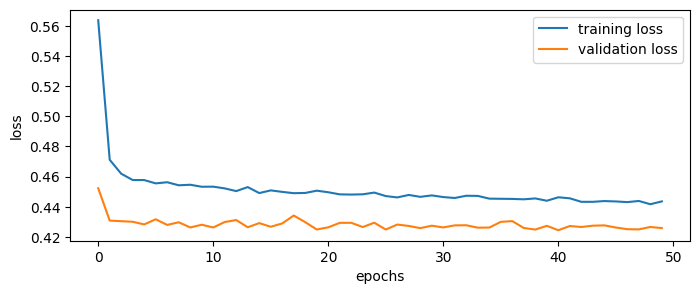

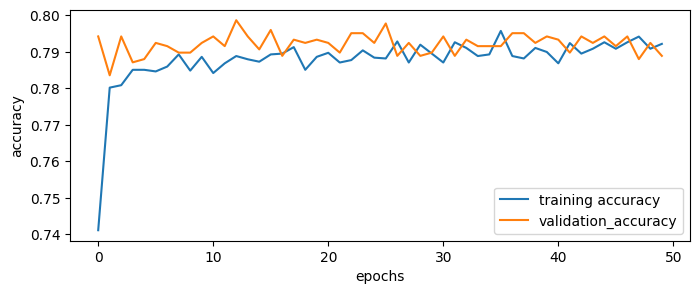

In [545]:
plt.figure(figsize=(8,3))
plt.plot(history.history['loss'] , label = 'training loss')
plt.plot(history.history['val_loss'] , label = 'validation loss')
plt.xlabel('epochs')
plt.ylabel("loss")
plt.legend()


plt.figure(figsize=(8,3))
plt.plot(history.history['accuracy'] , label = 'training accuracy')
plt.plot(history.history['val_accuracy'] , label = 'validation_accuracy')
plt.xlabel('epochs')
plt.ylabel("accuracy")
plt.legend()

In [546]:
pip install keras-tuner --upgrade

In [547]:
import keras_tuner as kt

In [548]:
tuner = kt.RandomSearch(
    create_model ,
    objective = 'val_accuracy' ,
    max_trials = 5 ,
    directory = 'keras_tuning' ,      ## with the name of kers_tuning we store this in a directory
    project_name = 'churn_prediction'
)

Reloading Tuner from keras_tuning/churn_prediction/tuner0.json


In [549]:
import tensorflow as tf
stop_early = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss' , patience = 3)

In [550]:
tuner.search(
    X_train_scaled , y_train ,
    epochs = 20 ,
    validation_split = 0.20 ,
    callbacks = [stop_early]
)

In [551]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_hps)

for param in best_hps.values:
  print(f'{param} : {best_hps.get(param)}')

units_1 : 128
second_layer : False


In [552]:
best_model = tuner.hypermodel.build(best_hps)
best_history = best_model.fit(
    X_train_scaled , y_train ,
    epochs = 50 ,
    batch_size = 32 ,
    validation_split = 0.20
)

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7091 - loss: 0.5804 - val_accuracy: 0.7870 - val_loss: 0.4493
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7923 - loss: 0.4568 - val_accuracy: 0.7826 - val_loss: 0.4363
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7801 - loss: 0.4612 - val_accuracy: 0.7870 - val_loss: 0.4309
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7841 - loss: 0.4664 - val_accuracy: 0.7862 - val_loss: 0.4287
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7843 - loss: 0.4638 - val_accuracy: 0.7897 - val_loss: 0.4297
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7855 - loss: 0.4520 - val_accuracy: 0.7888 - val_loss: 0.4275
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.7759 - loss: 0.4709 - val_accuracy: 0.7844 - val_loss: 0.4262
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7885 - loss: 0.4458 - val_accur

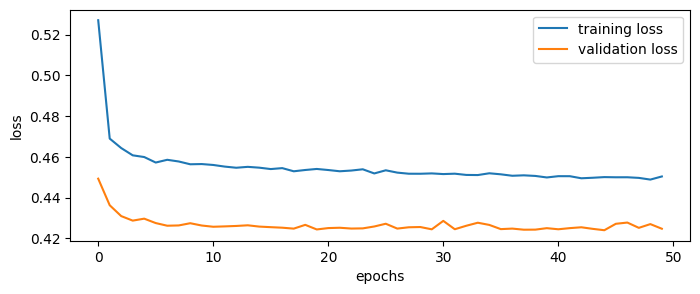

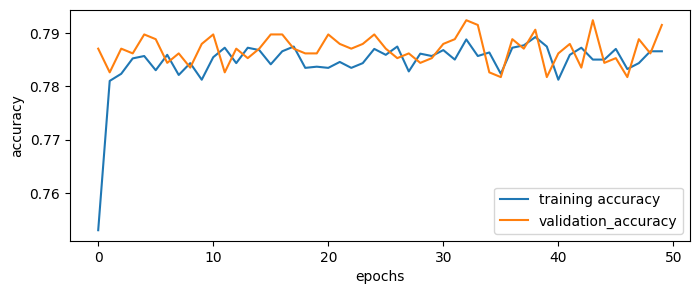

In [553]:
plt.figure(figsize=(8,3))
plt.plot(best_history.history['loss'] , label = 'training loss')
plt.plot(best_history.history['val_loss'] , label = 'validation loss')
plt.xlabel('epochs')
plt.ylabel("loss")
plt.legend()


plt.figure(figsize=(8,3))
plt.plot(best_history.history['accuracy'] , label = 'training accuracy')
plt.plot(best_history.history['val_accuracy'] , label = 'validation_accuracy')
plt.xlabel('epochs')
plt.ylabel("accuracy")
plt.legend()

In [554]:
best_loss , best_accuracy = best_model.evaluate(X_test_scaled , y_test)
print(f'best model loss : {best_loss}')
print(f'best model accuracy : {best_accuracy}')

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7980 - loss: 0.4249
best model loss : 0.42260435223579407
best model accuracy : 0.7977288961410522


In [555]:
loss , accuracy = intial_model.evaluate(X_test_scaled , y_test)
print(f'initial model loss : {loss}')
print(f'initial model accuracy : {accuracy}')

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8025 - loss: 0.4253
initial model loss : 0.4228692650794983
initial model accuracy : 0.8041163682937622


In [556]:
print(f'improvement : {(accuracy - best_accuracy)}')

improvement : 0.006387472152709961


In [557]:
intial_model.save('initial_churn_model.h5')
best_model.save('best_churn_model.h5')

# A .h5 file is a data file saved in the Hierarchical Data Format version 5 (HDF5), which is a versatile
#  and eff icient format for storing and organizing large amounts of scientific and numerical data.

In [558]:
with open('selected_features.pkl' , 'wb') as f:
  pickle.dump(selected_featues , f)

In [574]:
## load all your files
def load_model_components():
  model = load_model('initial_churn_model.h5')

  ##load scaler data

  with open('scaler.pkl' , 'rb') as f:
    scaler = pickle.load(f)



  ##load selected_features

  with open('selected_features.pkl' , 'rb') as f:
    selected_features = pickle.load(f)


  return model , scaler , selected_features

In [581]:
def predict_churn(*args):
  model , scaler , selected_features = load_model_components()
  input_data = pd.DataFrame([args] , columns = selected_featues)
  input_scaled = scaler.transform(input_data)
  prediction = model.predict(input_scaled) [0] [0]
  print(f'prediction:{prediction}')
  probablity = float(prediction)
  churn_status = 'Yes' if probablity > 0.50 else 'No'

  return {
      'churn probablity' : probablity ,
      'will the customer churn' : churn_status
  }

In [582]:
selected_featues

#[34 , 56.95 , 1889.50 , False , False]

['tenure',
 'MonthlyCharges',
 'TotalCharges',
 'MultipleLines_Yes',
 'PaymentMethod_Credit card (automatic)']

In [583]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [584]:
predict_churn(34 , 56.95 , 1889.50 , False , False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
prediction:0.1922229677438736


{'churn probablity': 0.1922229677438736, 'will the customer churn': 'No'}